In [ ]:
import numpy as np
import pandas as pd
import os

np.random.seed(165)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

path="C:\\Users\jsciamma\Documents\Patrick\ML\Kaggle\HousePrices"
os.chdir(path)
os.getcwd()

train = pd.read_csv("data\\train.csv")
test = pd.read_csv("data\\test.csv")

In [159]:
traintrain = train.iloc[0:1168, ]
traintest = train.iloc[1168:, ]

In [160]:
traintrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      962 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            70 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-nu

In [4]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

missing_values_table(traintrain)

,Missing Values,% of Total Values
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,206,17.636986
LotArea,0,0.000000
Street,0,0.000000
Alley,1098,94.006849
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


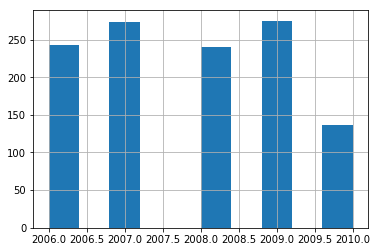

In [5]:
t_nonulls = traintrain.loc[:,traintrain.isnull().sum() == 0]
traintrain.YrSold.hist()

In [171]:
def create_dummies(x):
    y = x.drop('Neighborhood', axis=1).dropna(axis=1).loc[:, x.dtypes == object]
    return pd.get_dummies(y, columns=y.columns, drop_first=True)

def select_nonobjects(x):
    return x.dropna(axis=1).loc[:, x.dtypes != object]

def add_neighborhood_mean(x):
    return pd.DataFrame(index = x.index, data = x.groupby('Neighborhood').SalePrice.transform(np.mean),
                        columns = ['Neighborhoodmean'])

def transform_data(x):
    return pd.concat([create_dummies(x),select_nonobjects(x), add_neighborhood_mean(x)])

x1 = create_dummies(traintrain)
x2 = select_nonobjects(traintrain)
x3 = add_neighborhood_mean(traintrain)

#traintrain_transform = transform_data(traintrain)
#traintrain_transform
pd.DataFrame(index = traintrain.index, data = traintrain.groupby('Neighborhood').SalePrice.transform(np.mean)).rename(columns)

,SalePrice
0,197831.855932
1,233250.000000
2,197831.855932
3,200583.081081
4,318783.571429
5,160809.081081
6,227530.575758
7,190498.272727
8,128869.544444
9,124355.000000


In [118]:
create_dummies(traintrain.drop('Neighborhood', axis=1)).corrwith(traintrain.SalePrice).sort_values(ascending=False)

Foundation_PConc         0.505569
ExterQual_Gd             0.453957
SaleType_New             0.388887
SaleCondition_Partial    0.381792
KitchenQual_Gd           0.327038
Exterior1st_VinylSd      0.324711
Exterior2nd_VinylSd      0.323123
HouseStyle_2Story        0.261467
CentralAir_Y             0.255398
Electrical_SBrkr         0.254168
MSZoning_RL              0.250860
PavedDrive_Y             0.238228
RoofStyle_Hip            0.232018
RoofMatl_WdShngl         0.191232
Exterior1st_CemntBd      0.144690
LotShape_IR2             0.133139
ExterCond_TA             0.129833
Exterior2nd_CmentBd      0.128664
LotConfig_CulDSac        0.121454
Functional_Typ           0.119345
Condition1_Norm          0.116740
MSZoning_FV              0.099330
LandContour_HLS          0.097322
Condition2_PosN          0.054823
Condition2_PosA          0.053658
Condition1_PosN          0.051743
Exterior2nd_Other        0.051429
Street_Pave              0.051353
LotShape_IR3             0.049966
LandContour_Lo

In [93]:
traintrain.loc[:, traintrain.dtypes == object]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
traintrain.groupby(by='YrSold').SalePrice.mean()

In [ ]:
pd.get_dummies(traintrain, columns=['Pclass','Sex', 'Embarked', 'Title'], drop_first=True)

In [57]:
traintrain.corr().SalePrice.sort_values(ascending = False)

SalePrice           1.000000
OverallQual         0.793990
Neighborhoodmean    0.742660
GrLivArea           0.731740
GarageCars          0.654022
GarageArea          0.640045
TotalBsmtSF         0.639045
1stFlrSF            0.616289
FullBath            0.567586
TotRmsAbvGrd        0.564707
YearBuilt           0.534171
YearRemodAdd        0.523972
GarageYrBlt         0.503075
MasVnrArea          0.481693
Fireplaces          0.462045
BsmtFinSF1          0.390585
LotFrontage         0.363292
2ndFlrSF            0.327941
OpenPorchSF         0.327246
WoodDeckSF          0.321563
HalfBath            0.298880
LotArea             0.264943
BsmtFullBath        0.221899
BsmtUnfSF           0.220084
BedroomAbvGr        0.178122
ScreenPorch         0.130335
MoSold              0.045254
PoolArea            0.012658
3SsnPorch           0.011533
BsmtFinSF2         -0.000655
BsmtHalfBath       -0.024727
LowQualFinSF       -0.029905
YrSold             -0.030234
MiscVal            -0.037137
Id            

In [6]:
traintrain.groupby(by='YrSold').SalePrice.mean().plot

In [7]:
traintrain.groupby(by='Neighborhood').SalePrice.mean().sort_values(ascending=False)

Neighborhood
NoRidge    318783.571429
NridgHt    318458.485294
StoneBr    314107.608696
Timber     243325.964286
Veenker    233250.000000
Somerst    227530.575758
ClearCr    214159.666667
Crawfor    200583.081081
CollgCr    197831.855932
Blmngtn    192688.466667
Gilbert    191401.937500
NWAmes     190498.272727
SawyerW    186082.196078
Mitchel    160809.081081
NAmes      145927.629213
NPkVill    144714.285714
SWISU      142416.700000
Blueste    137500.000000
Sawyer     136448.312500
OldTown    128869.544444
Edwards    127176.923077
BrkSide    124355.000000
BrDale     104408.333333
IDOTRR     100914.545455
MeadowV     97120.000000
Name: SalePrice, dtype: float64

C:\Users\jsciamma\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [76]:
#subframe = traintrain[[ 'GrLivArea']]
fields = ['Neighborhoodmean', 'GrLivArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd']
subframe = traintrain[fields]
subframe

,Neighborhoodmean,GrLivArea,OverallQual,YearBuilt,YearRemodAdd
0,197831.855932,1710,7,2003,2003
1,233250.000000,1262,6,1976,1976
2,197831.855932,1786,7,2001,2002
3,200583.081081,1717,7,1915,1970
4,318783.571429,2198,8,2000,2000
5,160809.081081,1362,5,1993,1995
6,227530.575758,1694,8,2004,2005
7,190498.272727,2090,7,1973,1973
8,128869.544444,1774,7,1931,1950
9,124355.000000,1077,5,1939,1950


In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lin_reg = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression()),
])

lin_reg.fit(traintrain_transform, np.log(traintrain.SalePrice))
lin_reg.score(traintrain_transform,np.log(traintrain.SalePrice))

ValueError: could not convert string to float: 'AllPub'

In [ ]:
?lin_reg.score

In [90]:
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(lin_reg, subframe, np.log(traintrain.SalePrice), cv=10, scoring="neg_mean_squared_error"))


array([ 0.16724021,  0.15366076,  0.16056326,  0.17517007,  0.2049834 ,
        0.17892204,  0.16878279,  0.15735781,  0.16408714,  0.15412139])

## Test

In [12]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 1168 to 1459
Data columns (total 81 columns):
Id               292 non-null int64
MSSubClass       292 non-null int64
MSZoning         292 non-null object
LotFrontage      239 non-null float64
LotArea          292 non-null int64
Street           292 non-null object
Alley            21 non-null object
LotShape         292 non-null object
LandContour      292 non-null object
Utilities        292 non-null object
LotConfig        292 non-null object
LandSlope        292 non-null object
Neighborhood     292 non-null object
Condition1       292 non-null object
Condition2       292 non-null object
BldgType         292 non-null object
HouseStyle       292 non-null object
OverallQual      292 non-null int64
OverallCond      292 non-null int64
YearBuilt        292 non-null int64
YearRemodAdd     292 non-null int64
RoofStyle        292 non-null object
RoofMatl         292 non-null object
Exterior1st      292 non-null object
Exterior2n

In [79]:
d = pd.DataFrame((traintrain.groupby('Neighborhood')
                  .SalePrice.agg(np.mean))
                 .reset_index()
                 .rename(columns={'SalePrice': 'Neighborhoodmean'})
                )
d
traintest2 = pd.merge(traintest, d, on='Neighborhood')


In [14]:
traintest2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 82 columns):
Id                  292 non-null int64
MSSubClass          292 non-null int64
MSZoning            292 non-null object
LotFrontage         239 non-null float64
LotArea             292 non-null int64
Street              292 non-null object
Alley               21 non-null object
LotShape            292 non-null object
LandContour         292 non-null object
Utilities           292 non-null object
LotConfig           292 non-null object
LandSlope           292 non-null object
Neighborhood        292 non-null object
Condition1          292 non-null object
Condition2          292 non-null object
BldgType            292 non-null object
HouseStyle          292 non-null object
OverallQual         292 non-null int64
OverallCond         292 non-null int64
YearBuilt           292 non-null int64
YearRemodAdd        292 non-null int64
RoofStyle           292 non-null object
RoofMatl            29

In [80]:
lin_reg.score(traintest2[fields],np.log(traintest2.SalePrice))

0.74836072876408544

In [81]:
predicted = lin_reg.predict(traintest2[fields])

In [91]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(traintest2.SalePrice), predicted))

0.19619167153862804

## Submission

In [83]:
traintest2['Neighborhoodmean'].describe()

count       292.000000
mean     180046.040837
std       55092.167599
min       97120.000000
25%      136448.312500
50%      186082.196078
75%      198519.662219
max      318783.571429
Name: Neighborhoodmean, dtype: float64

In [84]:
# re-create full training set
full = pd.concat([traintrain, traintest2])
# re-fit on full set
final_lin_reg = LinearRegression()
final_lin_reg.fit(full[fields], np.log(full.SalePrice))
final_lin_reg.score(full[fields],np.log(full.SalePrice))

0.81129268196318038

In [85]:
# add neighborhood means
test2 = pd.merge(test, d, on='Neighborhood')

In [68]:
test2.groupby('Neighborhood').mean().loc[:, 'Neighborhoodmean']

Neighborhood
Blmngtn    192688.466667
Blueste    137500.000000
BrDale     104408.333333
BrkSide    124355.000000
ClearCr    214159.666667
CollgCr    197831.855932
Crawfor    200583.081081
Edwards    127176.923077
Gilbert    191401.937500
IDOTRR     100914.545455
MeadowV     97120.000000
Mitchel    160809.081081
NAmes      145927.629213
NPkVill    144714.285714
NWAmes     190498.272727
NoRidge    318783.571429
NridgHt    318458.485294
OldTown    128869.544444
SWISU      142416.700000
Sawyer     136448.312500
SawyerW    186082.196078
Somerst    227530.575758
StoneBr    314107.608696
Timber     243325.964286
Veenker    233250.000000
Name: Neighborhoodmean, dtype: float64

In [86]:
test2[fields].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 5 columns):
Neighborhoodmean    1459 non-null float64
GrLivArea           1459 non-null int64
OverallQual         1459 non-null int64
YearBuilt           1459 non-null int64
YearRemodAdd        1459 non-null int64
dtypes: float64(1), int64(4)
memory usage: 68.4 KB


In [87]:
test2predicted = np.exp(lin_reg.predict(test2[fields]))

In [88]:
df = pd.DataFrame(index=test2.Id, data=test2predicted, columns=['SalePrice'])

In [35]:
df

,SalePrice
Id,
1461,116467.605664
1462,137639.237889
1470,115840.343478
1471,138064.631105
1510,132584.454470
1511,131413.382966
1512,147592.326017
1513,163477.188381
1514,160540.132254


In [89]:
if True:
    df.to_csv("output\\result_20171117_1822.csv")